### HW2 PLA and Pocket

In this homework we will implement both the Perceptron Learning Algorithm (PLA) and an improvement called the Pocket algorithm.

We will run these classifiers on synthetic and real data, and see how they perform on the training and testing sets.

For the purposes of testing the PLA, we first make some "blobs" which we will try to classify.

The initial decision boundary is just a made up value that happens to work pretty well.

This data is linearly separable, so PLA can classify it with no errors.

Remember the pseudocode for the perceptron (you should have this in your notes, and in the book):

```
Input: X, an N x (d+1) dimensional matrix with a bias column
Input: y, an N dimensional vector of +1 and -1.

w = a vector of d+1 zeros (or random numbers)
While a misclassified instance x,y exists:
    w = w+x*y

Return w
```

We know that if $\mathcal{D}$ is not linearly separable then this will never terminate.

For that reason we also include a parameter called `max_iter` which is the maximum number of iterations we will try. The default value is 1000. 

Your PLA should return the learned $\bar{w}$ and the number of iterations it actually took to converge.

In your notes you should find numpy code for detecting misclassifications.

#### Testing

If you read through this document (before starting) you will see that the correct output is shown, although the code that made the correct output has been deleted.

As you work on your own code you will destroy the correct outputs. 

So that you can continue to use them, I have saved an HTML copy of this document in this folder.  You can use the HTML doc to see what the right answers should be.



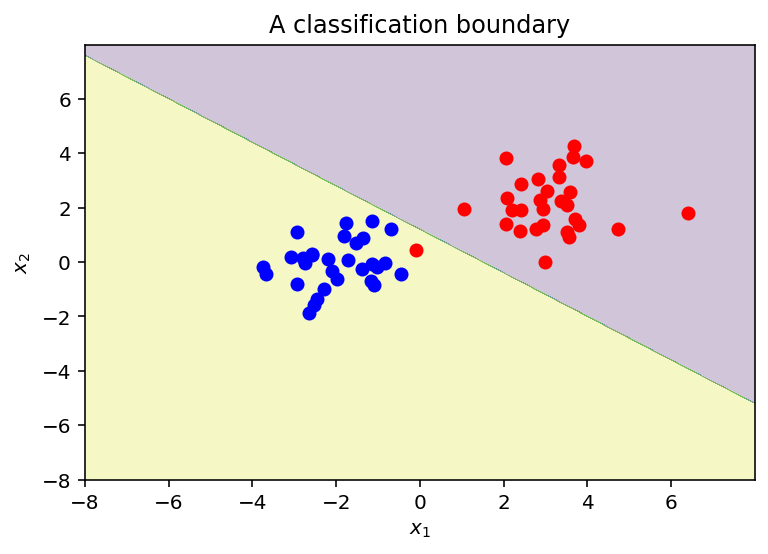

Help on module mystuff:

NAME
    mystuff

FUNCTIONS
    compare_boundary(w, ww, X, y, xmin=-8, xmax=8, ymin=-8, ymax=8)
        lin_boundary(w,X,y,xmin=-8,xmax=8,ymin=-8,ymax=8)
    
    lin_boundary(w, X, y, xmin=-8, xmax=8, ymin=-8, ymax=8)
        lin_boundary(w,X,y,xmin=-8,xmax=8,ymin=-8,ymax=8)
    
    myblobs(N=30, sig_yes=1, sig_no=1)

FILE
    /home/user/ML_Spr_20/Homeworks/HW2_PLA/mystuff.py




In [41]:
## The practice data (nothing to do here)

import mystuff as ms
import numpy as np

np.random.seed(666)

X,y,w = ms.myblobs()

ms.lin_boundary(w,X,y)

help(ms)

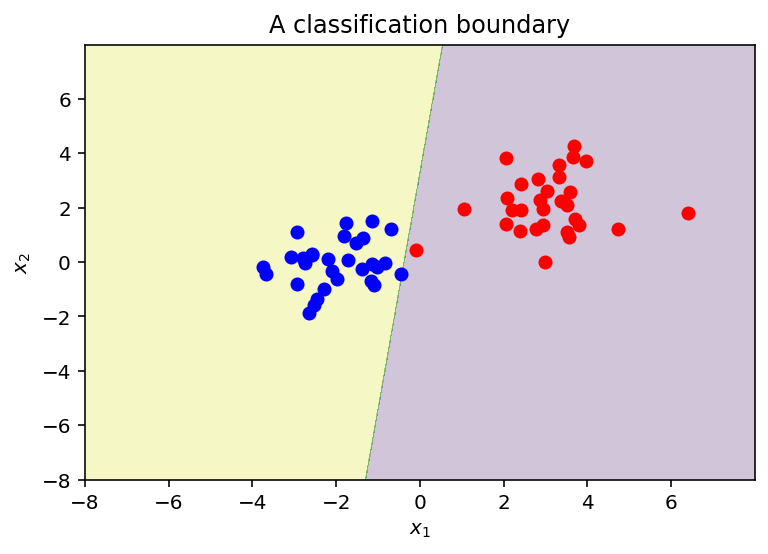

Finished in 7 iterations
E_in = 0.0


In [42]:
"""
******************************************************************************************************
Input: X, an N x (d+1) dimensional matrix with a bias column
Input: y, an N dimensional vector of +1 and -1.

w = a vector of d+1 zeros (or random numbers)
While a misclassified instance x,y exists:
    w = w+x*y

Return w
******************************************************************************************************

What you have to do is pick just one misclassified x and the corresponding y.  For instance you might do this:

x = X[mc][0]   #  This one is as good as any.
ymc = y[mc][0]  # this is the corresponding y value.

Now you can use x and ymc the way x and y are used in the pseudocode.
******************************************************************************************************

The problem is that mc needs to be updated inside the loop.
Each time through the loop you should get a fresh misclassified point, if one exists.
If none exist, then break out of the loop....

******************************************************************************************************
The problem is that mc needs to be updated inside the loop.  Each time through the loop you 
should get a fresh misclassified point, if one exists.  If none exist, then break out of the loop....
*******************************************************************************************************
"""

def PLA(X,y,w,max_iter=1000):
    i = 0
    mc = (np.sign(X.dot(w)) != y)
    while(mc.any()):
        w = w+((X[mc][0])*(y[mc][0]))
        mc = (np.sign(X.dot(w)) != y)
        i+=1
        if(mc.any()==False or i>=max_iter):
            break
    max_iter = i
    return w, max_iter

def E_in(X,y,w):
    mc = (np.sign(X.dot(w)) != y)
    return np.sum(mc)/len(mc)


w = np.zeros(X.shape[1])

w,i=PLA(X,y,w)
ms.lin_boundary(w,X,y)

print("Finished in {} iterations".format(i))
print("E_in = {}".format(E_in(X,y,w)))

### Nonlinearly separable data

Below we try the PLA on data that is not linearly separable.

You can see that the PLA doesn't do so well on this.  

Have a look at Figure 3.2 on pg 83 of Learning From Data for more insight. 

There's nothing to do here, except take note and pity the poor PLA.


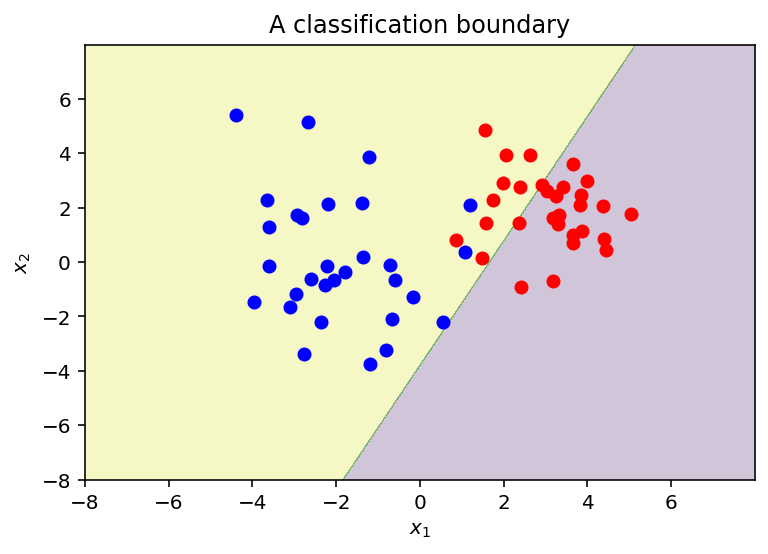

Finished in 1000 iterations
E_in = 0.15


In [43]:
import mystuff as ms
import numpy as np
np.random.seed(1000)
X,y,w = ms.myblobs(sig_yes=2)

w = np.zeros(X.shape[1])
w,i=PLA(X,y,w)
ms.lin_boundary(w,X,y)

print("Finished in {} iterations".format(i))
print("E_in = {}".format(E_in(X,y,w)))

### The Pocket Algorithm

The pocket algorithm is an improvement on the PLA that works much better on data that isn't linearly separable.

Because most data in nature is not linearly separable this is important if you really want to use the perceptron for something.

The pocket algorithm is described on page 80 of learning from data.

For your convenience I will copy the pseudocode here:

```
w(0) = a vector of d+1 zeros
w_hat = w(0)
for t=0,...,max_iter-1:
    Run PLA for one update to obtain w(t+1)
    Evaluate E_in(w(t+1))
    If w(t+1) is better than w_hat in terms of E_in, set w_hat to w(t+1)
Return w_hat
```

Please do not literally put `w(t+1)` or something like that in your program -- that is just mathematical notation and not code. Read the chapter for more clarification.

Reading section 3.1.1 of the book before beginning is strongly recommended.


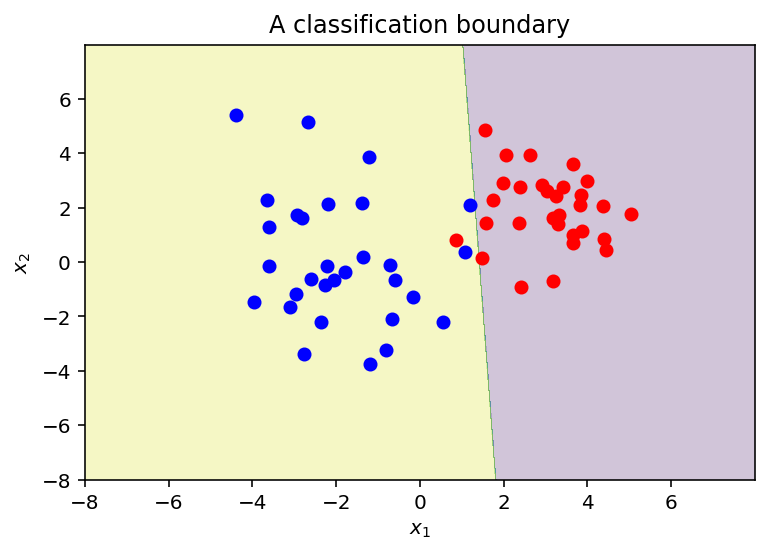

Finished in 999 iterations
E_in = 0.016666666666666666


In [44]:
"""
w(0) = a vector of d+1 zeros
w_hat = w(0)
for t=0,...,max_iter-1:
    Run PLA for one update to obtain w(t+1)
    Evaluate E_in(w(t+1))
    If w(t+1) is better than w_hat in terms of E_in, set w_hat to w(t+1)
Return w_hat
"""
def Pocket(X,y,w,max_iter=1000):
    w_hat = w
    t = 0
    for t in range(max_iter-1):
        mc = (np.sign(X.dot(w)) != y)
        w,i=PLA(X,y,w,1)
        if(E_in(X,y,w)<E_in(X,y,w_hat)):
            w_hat=w
            mc=(np.sign(X.dot(w))!=y)
        t+=1
    return w_hat,t


w = np.zeros(X.shape[1])
w,i=Pocket(X,y,w)
ms.lin_boundary(w,X,y)

print("Finished in {} iterations".format(i))
print("E_in = {}".format(E_in(X,y,w)))


### Measuring Performance

As we discussed in class (see the Feasibility of Learning notes), the performance of the PLA or pocket algorithms on all of $X$ is note a good measure of how that hypothesis will perform out of sample.

We always want to know how good our classifier really is.

For that reason we will try using training and testing data.

We will run the pocket algorithm on the training data to find a good $\bar{w}$.

Then we will see how that $\bar{w}$ does on the testing data.  

This will give us some idea of how $\bar{w}$ would perform out of sample.


### Train test split

Below you are given a function that implements a train-test split.

Just briefly take note of how it works -- 80% of data is for training by default.

Notice that the rows that go into the training or testing set are randomly selected.


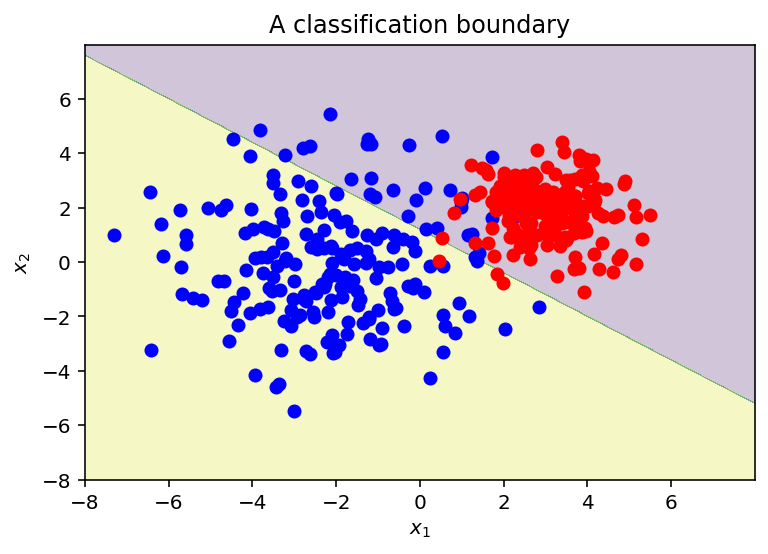

In [45]:
def train_test_split(X,y,train_pct=0.8):
    cutoff = int(train_pct*X.shape[0])
    train = np.random.choice(np.arange(X.shape[0]),cutoff,replace=False)
    test = np.array(list(set(np.arange(X.shape[0])).difference(set(train))))
    return X[train],y[train],X[test],y[test]

np.random.seed(1999)
X,y,w = ms.myblobs(N=200,sig_yes=2)
ms.lin_boundary(w,X,y)


### Performance

Below we train the pocket algorithm on the training set and test it on the testing set.

Notice that the error on the training set as only about half of the more realistic value we get on the test set.


Finished in 999 iterations
Best hypothesis on the training set:
E_in (train) = 0.03125


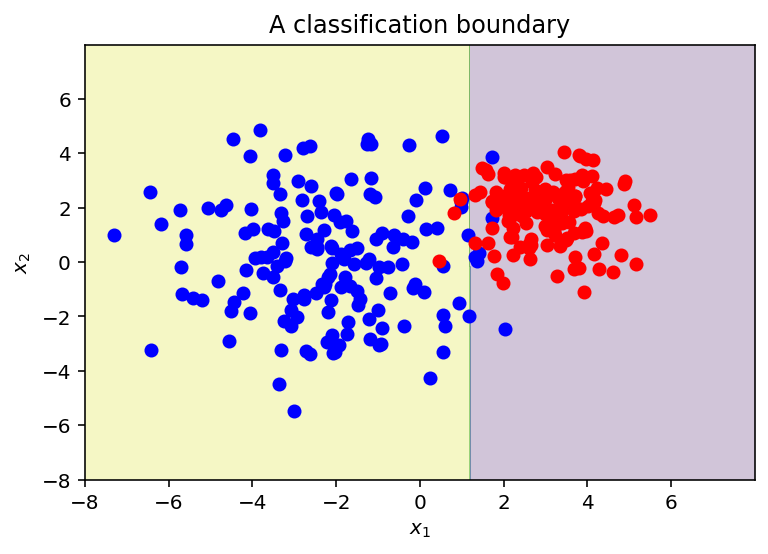

Best hypothesis on the testing set:
E_in (test) = 0.05


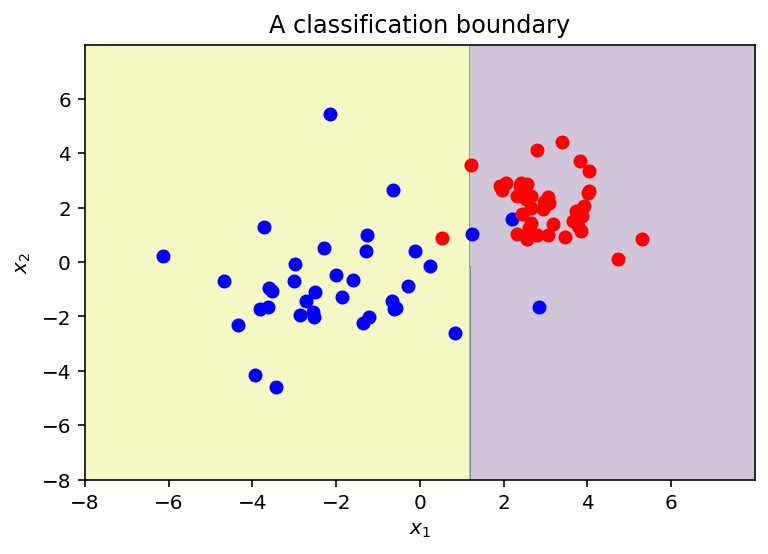

In [46]:
X_train,y_train,X_test,y_test = train_test_split(X,y)

w = np.zeros(X.shape[1])
w,i=Pocket(X_train,y_train,w)
print("Finished in {} iterations".format(i))

print("Best hypothesis on the training set:")
print("E_in (train) = {}".format(E_in(X_train,y_train,w)))
ms.lin_boundary(w,X_train,y_train)

print("Best hypothesis on the testing set:")
print("E_in (test) = {}".format(E_in(X_test,y_test,w)))
ms.lin_boundary(w,X_test,y_test)




### Real Data

In the above examples we ran the pocket algorithm on 2d data that we just made up.

But your code should work on data of any dimension. 

Below we'll use the pocket algorithm on the Wisconsin Breast Cancer dataset.


In [47]:
## numpy doesn't play well with strings, so we replace M and B with 1 and 0

import pandas as pd

df = pd.read_csv("wdbc.data.txt",header=None,index_col=0)

df = df.replace('M',1).replace('B',-1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
X = df.values  ## Converts from pandas to a numpy array

y = np.copy(X[:,0])  # get target values in first column
X[:,0] = 1 # convert first column to bias column

X_train,y_train,X_test,y_test = train_test_split(X,y)

w = np.zeros(X.shape[1])
w,i=Pocket(X_train,y_train,w,max_iter=1000)
print("Finished in {} iterations".format(i))

print("Best hypothesis on the training set:")
print("E_in (train) = {}".format(E_in(X_train,y_train,w)))

print("Best hypothesis on the testing set:")
print("E_in (test) = {}".format(E_in(X_test,y_test,w)))



Finished in 999 iterations
Best hypothesis on the training set:
E_in (train) = 0.14505494505494507
Best hypothesis on the testing set:
E_in (test) = 0.14912280701754385


###  That was terrible!

The accuracy of the pocket algorithm on the breast cancer data is only about 15%. 

We can massively improve performance by scaling the data.

This means putting each column roughly in the same range of values.

We use minmax scaling. 

Be careful when you scale not to cheat by looking prematurely at the testing data.

The scaling parameters have to be based solely on the training data.

In this case we need the max and min values from each column.

We get these parameters from the training data, and then apply the minmax transformation as a subsequent step.


In [49]:
def minmax(X):
    mins = np.min(X,axis=0)
    maxs = np.max(X,axis=0)
    bias = np.allclose(X[:,0],np.ones(X.shape[0]))  ## Is there a bias column?
    if bias:  ## Without this max=min, causes divide-by-zero
        maxs[0]=1
        mins[0]=0
    return mins,maxs

def minmax_apply(X,mins,maxs):
    return (X-mins)/(maxs-mins)


In [50]:
mins,maxs = minmax(X_train)
X_train_norm = minmax_apply(X_train,mins,maxs)
X_test_norm = minmax_apply(X_test,mins,maxs)

In [51]:

w = np.zeros(X.shape[1])
w,i=Pocket(X_train_norm,y_train,w,max_iter=1000)
print("Finished in {} iterations".format(i))

print("Best hypothesis on the training set:")
print("E_in (train) = {}".format(E_in(X_train_norm,y_train,w)))

print("Best hypothesis on the testing set:")
print("E_in (test) = {}".format(E_in(X_test_norm,y_test,w)))


Finished in 999 iterations
Best hypothesis on the training set:
E_in (train) = 0.017582417582417582
Best hypothesis on the testing set:
E_in (test) = 0.02631578947368421


###  That's better

We got the out of sample error down below 3%.  That's pretty good.  



### Your turn

Try implementing mean normalization as described here: https://en.wikipedia.org/wiki/Feature_scaling

I suggest making the average of the bias column 0, if there is a bias column.

If you don't remember what `axis` means then you might want to review the numpy slides.


In [52]:
"""
I suggest making the average of the bias column 0, if there is a bias column.
#add a bias column of all 0's

bias = np.zeros((X1.shape[0],1))
X=np.hstack((bias,X1))

"""
def meannorm(X):
    ### You complete me
    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    bias = np.allclose(X[:,0],np.ones(X.shape[0]))  ## Is there a bias column?
    if bias:  ## Without this max=min, causes divide-by-zero
        mx[0]=1
        mn[0]=0
    mn,mx=minmax(X)
    meanorm=all([((X-np.mean(X)))/((max(X)-min(X)))])
    return mn,mx,meanorm

def meannorm_apply(X,mins,maxs,mu):
    return (X-mu)/(maxs-mins)

mins,maxs,mu = meannorm(X_train)
X_train_norm = meannorm_apply(X_train,mins,maxs,mu)
X_test_norm = meannorm_apply(X_test,mins,maxs,mu)


w = np.zeros(X.shape[1])
w,i=Pocket(X_train_norm,y_train,w,max_iter=1000)
print("Finished in {} iterations".format(i))

print("Best hypothesis on the training set:")
print("E_in (train) = {}".format(E_in(X_train_norm,y_train,w)))

print("Best hypothesis on the testing set:")
print("E_in (test) = {}".format(E_in(X_test_norm,y_test,w)))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()